In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/home/dhinesh/machinelearning/regularized-logesticregression/data/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [157]:
x = df.iloc[:,0:13].values
y = df.iloc[:,-1:].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

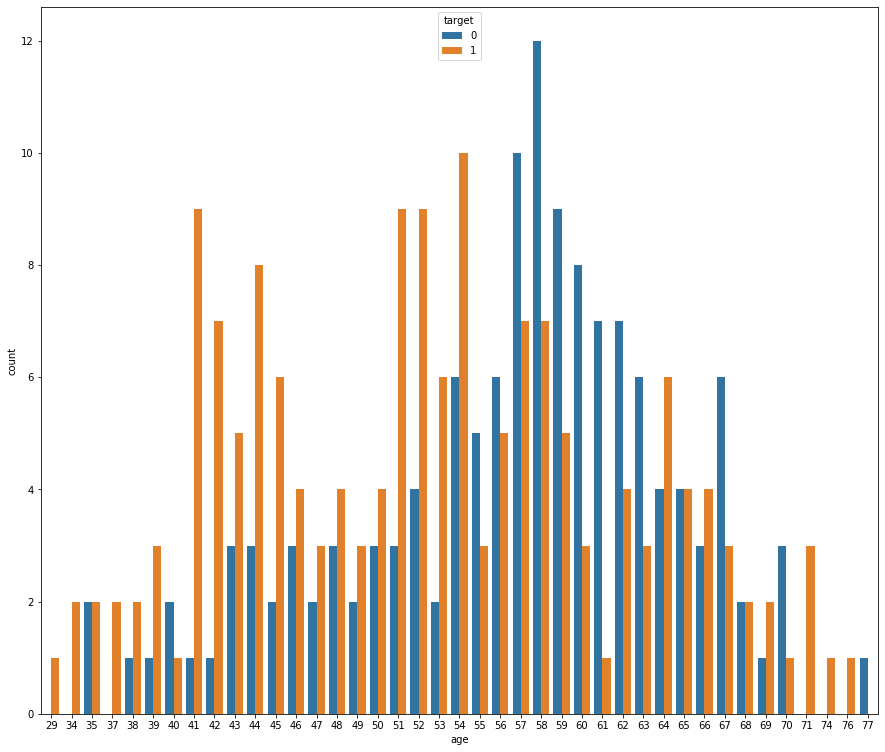

In [6]:
pl = sns.countplot("age",hue="target",data=df)
plt.rcParams["figure.figsize"] = (15, 13)
plt.rcParams["xtick.labelsize"] = 10
plt.show()

In [89]:
def sigmoid(z):
    
    return 1/(1+np.exp(-z))

In [100]:
def costfunction(theta,X,y):
    l = len(y)
    # here np.dot is a matrix multiplication gives dot product of matrix X and theta
    pred = sigmoid(np.dot(X,theta))
    # the pred is hθ(x)
    error = ((-y).T * np.log(pred)) - ((1-y).T *np.log(1-pred))
    
    cost = 1/l * sum(error)
    
    gradient = 1/l * np.dot(X.transpose(),(pred - y))

    return cost[0],gradient

# FEATURE NORMALIZATION
* In order to get better accuracy and prediction use feature normalizaton

In [101]:
def featurenorm(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    
    X_norm = (X - mean) / std
    
    return X_norm

# GRADIENT DESCENT
* Try to get global minima by changing learning rate and number of iterations
* Repeat {
     θj:= θj − α/m ∑ (hθ(x(i))−y(i)) xj(i)
     }

In [102]:
def gradientdescent(x,y,theta,alpha,iteration):
    cost_history = []
    iter_arr = []
    
    for i in range(iteration):
        cost,grad = costfunction(theta,X,y)
        theta = theta - (alpha * grad)
        cost_history.append(cost)
        iter_arr.append(i)
        
    return theta, cost_history, iter_arr

In [161]:
#Reshaping and get normalized features
u,v = x.shape[0], x.shape[1]
X = np.append(np.ones((u,1)),x,axis=1)
init_theta = np.zeros((v+1,1))
x_norm = featurenorm(X)
y_norm = featurenorm(y)
X_test = np.append(np.ones((x_test.shape[0],1)),x_test,axis=1)
x_norm_test = featurenorm(X_test)

/home/dhinesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [154]:
alpha = 0.000001
iteration = 1000
th, j_theta, iter_array = gradientdescent(x_norm,y,init_theta,alpha,iteration)
j_theta

[0.6931471805599467,
 0.6908699722356646,
 0.6886575380060818,
 0.6865079121741557,
 0.6844191937633654,
 0.6823895442130886,
 0.6804171851584715,
 0.678500396292045,
 0.6766375133043779,
 0.6748269259010709,
 0.6730670758934771,
 0.6713564553605652,
 0.6696936048793937,
 0.668077111821731,
 0.6665056087144289,
 0.6649777716611861,
 0.6634923188234461,
 0.662048008958214,
 0.6606436400106424,
 0.6592780477593201,
 0.6579501045122588,
 0.6566587178516196,
 0.6554028294253208,
 0.6541814137837122,
 0.6529934772595569,
 0.651838056889657,
 0.6507142193764828,
 0.6496210600882546,
 0.6485577020959631,
 0.6475232952458908,
 0.6465170152662356,
 0.6455380629065007,
 0.6445856631083651,
 0.6436590642067951,
 0.6427575371602205,
 0.6418803748086148,
 0.6410268911584103,
 0.6401964206931733,
 0.6393883177090549,
 0.6386019556740192,
 0.6378367266099558,
 0.6370920404967535,
 0.6363673246975029,
 0.6356620234039939,
 0.6349755971017312,
 0.6343075220537088,
 0.6336572898022211,
 0.63302440668801

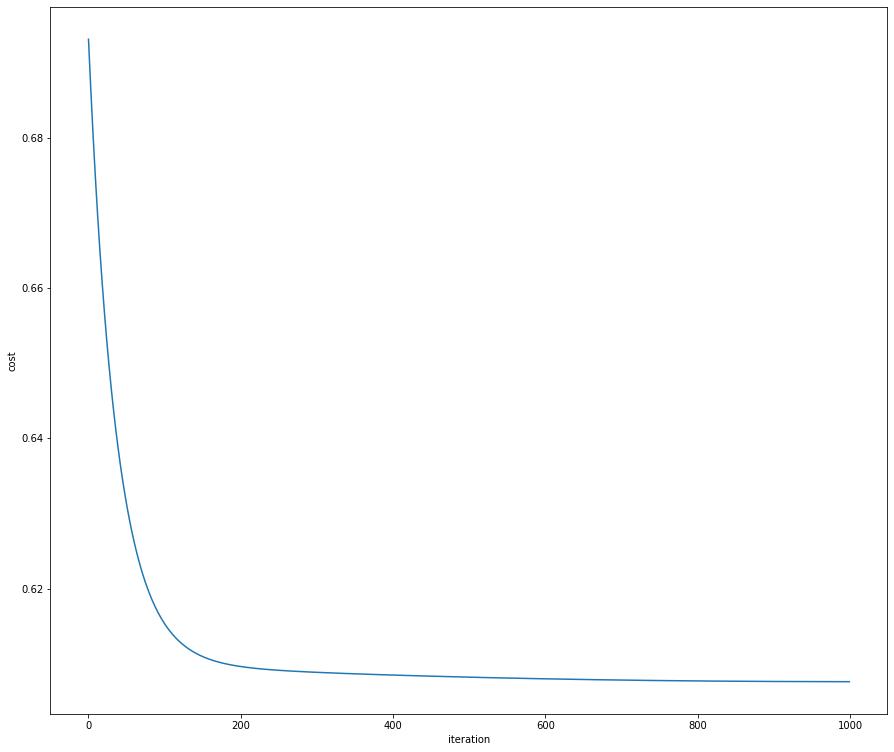

In [155]:
plt.plot(iter_array,j_theta)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

In [162]:
alph_test = 0.00001
iter_test = 400
th_test,j_theta_test,iter_array_test = gradientdescent(x_norm_test,y_test,th,alph_test,iter_test)

ValueError: operands could not be broadcast together with shapes (303,1) (61,1) 